#  MACHINE LEARNING ASSIGNMENT-2

# NAME: RAHUL D.S
# SRN: R19CS243

Import modules

In [59]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-deep')
from sklearn.metrics import confusion_matrix
import string



In [5]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [8]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [9]:
ham = df[df['Category'] == 'ham']
spam = df[df['Category'] == 'spam']

In [10]:
ham = ham.sample(spam.shape[0])

In [11]:
ham.shape, spam.shape

((747, 2), (747, 2))

In [12]:
data = ham.append(spam,ignore_index = True)

In [13]:
data.shape

(1494, 2)

# DATA CLEANING

In [14]:
import nltk
import re
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Category']=le.fit_transform(data['Category'])
data.head()

,Category,Message
0,0,Had the money issue weigh me down but thanks t...
1,0,"Some friends want me to drive em someplace, pr..."
2,0,Good night. Am going to sleep.
3,0,Not..tel software name..
4,0,I meant as an apology from me for texting you ...


In [60]:
def text_process(mess):
   
    
    nopunc = [char for char in mess if char not in string.punctuation]

  
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [62]:
df['Message'].head(10).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: Message, dtype: object

# DATA TRANSFORMATION

In [63]:
from sklearn.feature_extraction.text import CountVectorizer 

In [64]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Message'])

In [65]:
print(len(bow_transformer.vocabulary_))

11422


In [66]:
message4 = df['Message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [67]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4066)	2
  (0, 4627)	1
  (0, 5258)	1
  (0, 6201)	1
  (0, 6219)	1
  (0, 7183)	1
  (0, 9551)	2
(1, 11422)


In [68]:
print(bow_transformer.get_feature_names()[4066])
print(bow_transformer.get_feature_names()[9551])

U
say


In [69]:
messages_bow = bow_transformer.transform(df['Message'])

In [70]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11422)
Amount of Non-Zero occurences:  50500


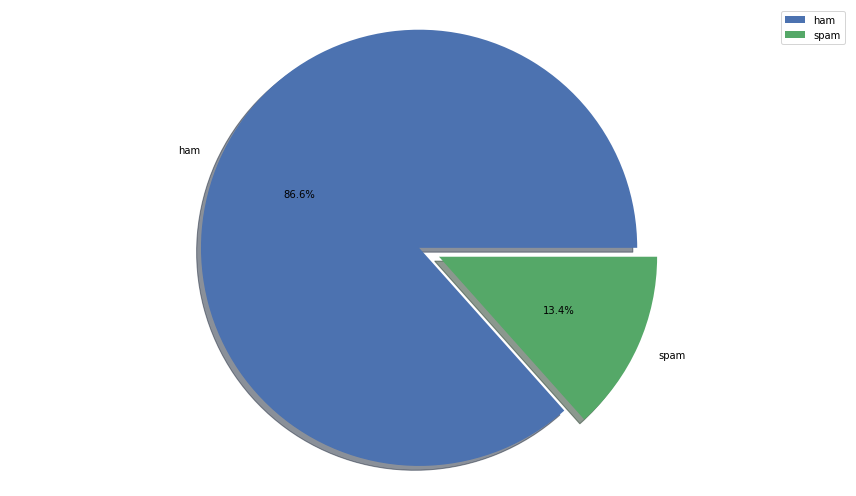

In [56]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Category'].value_counts(), explode=explode,labels=['ham','spam'], autopct='%1.1f%%',
        shadow=True)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

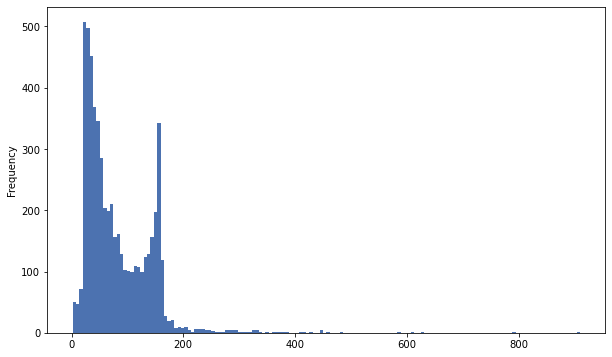

In [57]:
plt.figure(figsize=(10,6))
df['Length'].plot.hist(bins = 150)

In [58]:
df[df['Length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [72]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(messages_bow)
print(tfidf4)

  (0, 11160)	0.23026685592418913
  (0, 10962)	0.19073428545061483
  (0, 8914)	0.24704652376837993
  (0, 8333)	0.17046869292195632
  (0, 7665)	0.26403384065473806
  (0, 7552)	0.31253856260694546
  (0, 6934)	0.1834692413608692
  (0, 6903)	0.15158474664662352
  (0, 6214)	0.18915557732842803
  (0, 5766)	0.24984711892976424
  (0, 5215)	0.26870593862526665
  (0, 5214)	0.29835184088197164
  (0, 4651)	0.31253856260694546
  (0, 2058)	0.24203960256420656
  (0, 1480)	0.31253856260694546
  (0, 1107)	0.2882862016308418
  (1, 11069)	0.40059731892909933
  (1, 10695)	0.20657545787061052
  (1, 8587)	0.5043175634668231
  (1, 7698)	0.3767229062690876
  (1, 3062)	0.2911862458354422
  (1, 2449)	0.5619631532224204
  (2, 11120)	0.19104387220509106
  (2, 11081)	0.15898145347176754
  (2, 10683)	0.13995540820792943
  :	:
  (5568, 6879)	0.31367469776242124
  (5568, 6688)	0.47781076401785183
  (5568, 6351)	0.5575721048646767
  (5568, 4878)	0.3853122086093004
  (5569, 10196)	0.520467167163554
  (5569, 8249)	0.4328

# RANDOM FOREST CLASSIFICATION

In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier.fit(tfidf4, df['Category'])

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [74]:
print('predicted:', classifier.predict(tfidf4)[0])
print('expected:', df.Category[3])

predicted: ham
expected: ham


In [75]:
all_predictions = classifier.predict(messages_bow)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [76]:
from sklearn.metrics import classification_report
print (classification_report(df['Category'], all_predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      4825
        spam       1.00      0.96      0.98       747

    accuracy                           0.99      5572
   macro avg       1.00      0.98      0.99      5572
weighted avg       0.99      0.99      0.99      5572



In [77]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(df['Category'], all_predictions))

Accuracy: 0.9940775305096913


In [78]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['Message'], df['Category'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [80]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()),  
    ('classifier', RandomForestClassifier()), 
])

In [81]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000291BDCBBDC0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [83]:
predictions = pipeline.predict(msg_test)

Text(0.5, 257.44, 'Predicted label')

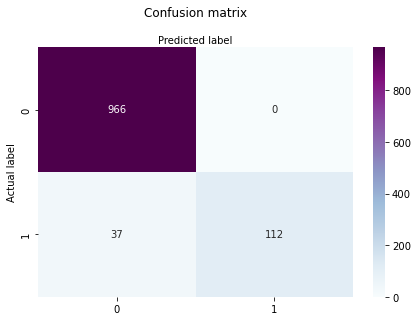

In [84]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(label_test,predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [85]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1003
        spam       0.75      1.00      0.86       112

    accuracy                           0.97      1115
   macro avg       0.88      0.98      0.92      1115
weighted avg       0.98      0.97      0.97      1115



In [86]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(predictions,label_test))

Accuracy: 0.9668161434977578
